<a href="https://colab.research.google.com/github/Arush0113/CE784/blob/main/Arush_CE784_assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing the necessary libraries

In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import time

### Connecting to google drive (Since I have used Colab)

In [143]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Question 1

In [144]:
df = pd.read_csv('/content/drive/MyDrive/ce784 assignment 2 dataset/cleaned.csv')

In [145]:
# Printing the 1st 50 elements
df.head(50)

,user,timestamp,x,y,z,class
0,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.053,0.78,-9.13,-3.74,bus
1,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.111,0.79,-9.11,-3.75,bus
2,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.169,0.80,-9.12,-3.75,bus
3,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.228,0.78,-9.14,-3.76,bus
4,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.286,0.83,-9.12,-3.80,bus
5,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.344,0.77,-9.13,-3.72,bus
6,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.403,0.80,-9.14,-3.76,bus
7,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.460,0.77,-9.12,-3.73,bus
8,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.519,0.77,-9.14,-3.73,bus
9,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.578,0.77,-9.10,-3.76,bus


In [146]:
df['user'][0]

'a2d80ed662f34d32951eb1c6ed076c313e358b73'

In [148]:
#Number of rows corresponding to 1st user
len(df[df['user'] == df['user'][0]]) 

3791

### Now printing all the necessary values asked in Q1

In [154]:
print("The various columns in our dataframe:")
print(df.columns)
print("\n The number of columns in our dataframe are:" , len(df.columns))
print("\n The number of rows (data points) in our dataframe are:", len(df))
print("\n The unique users in our data are:\n", df['user'].unique())
print("\n The number of  users in our data are:", len(df['user'].unique()))

The various columns in our dataframe:
Index(['user', 'timestamp', 'x', 'y', 'z', 'class'], dtype='object')

 The number of columns in our dataframe are: 6

 The number of rows (data points) in our dataframe are: 5653053

 The unique users in our data are:
 ['a2d80ed662f34d32951eb1c6ed076c313e358b73'
 'a526f3566e9c9024dfa7378eb4291d787a09fd37'
 'a59868c6eb3645eedbb343ce8c336ec6f2ef2324'
 'a92dee88f61123f923dccec01eeecf1a81953b36'
 'ac4c17afeb69b39169eb301ab592696a8f353976'
 'adaaae1a67ea9e43abd60ba945eccda0cb8821e0'
 'b138d165100ef60bc793cac143742eb5aea4d6ba'
 'b45157069942d01310c3e7b74034166717bb25f9'
 'b7b165e5637b5a0226068d907748f4bbfc61a320'
 'c453226e3616ae821cdcb38f38481c2a20f2482f'
 'c5702d34b238fe68683f818e82cd3a3cd8a16366'
 'ca7950f223a8037b897d0547075dc138f9e43b20'
 'cace4ec0999436917986b4fa6e9317262c897bc2'
 'cbde60baea002b694ecf2a3ff2d95be16b00efe1'
 'ce39f5d0705695fcd70a04ba6d84ac6beecd6f9c'
 'd429974540bfd38c3367fe9f0c8682775ff4fa18'
 'd7a1230d94f91a32cc079809748e52e8a4a6a

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5653053 entries, 0 to 5653052
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   user       object 
 1   timestamp  object 
 2   x          float64
 3   y          float64
 4   z          float64
 5   class      object 
dtypes: float64(3), object(3)
memory usage: 258.8+ MB


## Question 2

### Calulating the number of sequences corresonding to each user and each class. We shift both the user and class columns by one and equate them to the original columns. As a result, whenever our class or user changes, we get a value of 1 in user_c and class_c columns, and otherwise zero. We also note when 2 subsequent rows have a time diff > 10, which also means the sequence has changed. Finally we use the OR operator to note whenever the sequence changes.
### We also note the time taken for this part of Code to run. 

In [165]:
time_start = time.time()

series_user = df['user'].eq(df['user'].shift())
series_class = df['class'].eq(df['class'].shift())

In [166]:
series_user = ~series_user
series_class = ~series_class

In [167]:
df['user_c'] = series_user
df['class_c'] = series_class

In [171]:
df['timestamp_shifted'] = df['timestamp'].shift(1, axis=0)

In [172]:
df['timestamp'] = df['timestamp'].astype('datetime64[s]')
df['timestamp_shifted'] = df['timestamp_shifted'].astype('datetime64[s]')

In [173]:
df['time_diff'] = (df['timestamp'] - df['timestamp_shifted'])/np.timedelta64(1, 's')

In [174]:
df['seq_new'] = df['user_c'] | df['class_c'] | (df['time_diff'] > 10)

In [175]:
df['seq_new'].sum()

3378

### Now in the below cell, we use groupby() function to find the number of sequences corresponding to each user and class.

In [176]:
pd.set_option('display.max_rows',None, 'display.max_columns',None)
df1 = df.groupby(['user', 'class']).seq_new.sum()
df1

user                                      class 
a2d80ed662f34d32951eb1c6ed076c313e358b73  bus        12
a526f3566e9c9024dfa7378eb4291d787a09fd37  car        13
                                          walk       19
a59868c6eb3645eedbb343ce8c336ec6f2ef2324  bike       33
                                          bus        18
                                          car        63
                                          walk       10
a92dee88f61123f923dccec01eeecf1a81953b36  bus         3
ac4c17afeb69b39169eb301ab592696a8f353976  car        20
                                          walk       58
adaaae1a67ea9e43abd60ba945eccda0cb8821e0  bus        20
                                          car        17
                                          walk        9
b138d165100ef60bc793cac143742eb5aea4d6ba  car         9
b45157069942d01310c3e7b74034166717bb25f9  car         3
                                          walk        2
b7b165e5637b5a0226068d907748f4bbfc61a320  car       191

In [177]:
time_end = time.time()

In [181]:
calculated_time = time_end - time_start
print("The calculated time is:", calculated_time)

The calculated time is: 7.723074674606323


### Question 3

In [53]:
df['seq'] = df['seq_new'].cumsum(axis = 0, skipna = True)

In [54]:
df['seq'] = df['seq'] + 1

In [55]:
df['seq']

0             2
1             2
2             2
3             2
4             2
           ... 
5653048    3379
5653049    3379
5653050    3379
5653051    3379
5653052    3379
Name: seq, Length: 5653053, dtype: int64

### 'min_t' column stores the starting time for each sequence. We later substract it from all rows in a given sequence to get the change in time. We then divide this time difference by 5 to get the number of time window partitions in each sequence. We finallly use the groupby() function to get the number of partitions and sequences for each class and each user.

In [56]:
df['min_t'] = df.groupby('seq').timestamp.transform('min')

In [58]:
df['window_this_seq'] = (df['timestamp'] - df['min_t'])//np.timedelta64(5, 's')

In [59]:
df['window_id'] = df['seq'].astype('str') + "." + df['window_this_seq'].astype('str')

In [60]:
df['window_id']

0             2.0
1             2.0
2             2.0
3             2.0
4             2.0
            ...  
5653048    3379.2
5653049    3379.2
5653050    3379.2
5653051    3379.2
5653052    3379.2
Name: window_id, Length: 5653053, dtype: object

In [61]:
df.head()

,user,timestamp,x,y,z,class,user_c,class_c,timestamp_shifted,time_diff,seq_new,seq,min_t,window_this_seq,window_id
0,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55,0.78,-9.13,-3.74,bus,True,True,NaT,NaN,True,2,2018-06-04 16:26:55,0,2.0
1,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55,0.79,-9.11,-3.75,bus,False,False,2018-06-04 16:26:55,0.0,False,2,2018-06-04 16:26:55,0,2.0
2,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55,0.80,-9.12,-3.75,bus,False,False,2018-06-04 16:26:55,0.0,False,2,2018-06-04 16:26:55,0,2.0
3,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55,0.78,-9.14,-3.76,bus,False,False,2018-06-04 16:26:55,0.0,False,2,2018-06-04 16:26:55,0,2.0
4,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55,0.83,-9.12,-3.80,bus,False,False,2018-06-04 16:26:55,0.0,False,2,2018-06-04 16:26:55,0,2.0


In [64]:
prob_3 = df.drop(['timestamp','x','y','z','user_c','class_c', 'timestamp_shifted', 'time_diff', 'seq_new', 'seq', 'min_t', 'window_this_seq'], axis = 1)

In [65]:
prob_3

,user,class,window_id
0,a2d80ed662f34d32951eb1c6ed076c313e358b73,bus,2.0
1,a2d80ed662f34d32951eb1c6ed076c313e358b73,bus,2.0
2,a2d80ed662f34d32951eb1c6ed076c313e358b73,bus,2.0
3,a2d80ed662f34d32951eb1c6ed076c313e358b73,bus,2.0
4,a2d80ed662f34d32951eb1c6ed076c313e358b73,bus,2.0
...,...,...,...
5653048,faae5be800be2dfa897eea0bd2e5988cd53c4ec0,bike,3379.2
5653049,faae5be800be2dfa897eea0bd2e5988cd53c4ec0,bike,3379.2
5653050,faae5be800be2dfa897eea0bd2e5988cd53c4ec0,bike,3379.2
5653051,faae5be800be2dfa897eea0bd2e5988cd53c4ec0,bike,3379.2


### The below table shows the number of partitions for each user and class

In [66]:
sol_3 = prob_3.groupby(['user','class']).nunique()
pd.set_option('display.max_rows',None, 'display.max_columns',None)
sol_3

window_id
user                                     class            
a2d80ed662f34d32951eb1c6ed076c313e358b73 bus            34
a526f3566e9c9024dfa7378eb4291d787a09fd37 car          1542
                                         walk          298
a59868c6eb3645eedbb343ce8c336ec6f2ef2324 bike          565
                                         bus          3853
                                         car          2083
                                         walk          824
a92dee88f61123f923dccec01eeecf1a81953b36 bus           729
ac4c17afeb69b39169eb301ab592696a8f353976 car            62
                                         walk          479
adaaae1a67ea9e43abd60ba945eccda0cb8821e0 bus          1156
                                         car           533
                                         walk          153
b138d165100ef60bc793cac143742eb5aea4d6ba car           415
b45157069942d01310c3e7b74034166717bb25f9 car           428
                                         walk           74
b7b165e5637b5a0226068d907748f4bbfc61a320 car          2131
                                         walk          203
c453226e3616ae821cdcb38f38481c2a20f2482f bike          501
                                         bus          1467
c5702d34b238fe68683f818e82cd3a3cd8a16366 bike          203
                                         bus           198
                                         walk         1239
ca7950f223a8037b897d0547075dc138f9e43b20 walk           64
cace4ec0999436917986b4fa6e9317262c897bc2 car          1150
cbde60baea002b694ecf2a3ff2d95be16b00efe1 bus           413
ce39f5d0705695fcd70a04ba6d84ac6beecd6f9c bus           447
                                         car           505
d429974540bfd38c3367fe9f0c8682775ff4fa18 bus           519
                                         car           919
                                         walk          101
d7a1230d94f91a32cc079809748e52e8a4a6a22f bike          368
                                         train         418
                                         walk           80
d7dd12d83c81574137f858034b99f4cc83ab0718 car           673
d8c047eaaee204b7b5cd71e2d67308b87b038ed3 car          1761
                                         walk          163
dc0bdce306ec3b624fe0e6ecd1ffbd82cb970120 bike          573
                                         car           147
                                         walk           36
dd82e3df4bebc74ed6b67877be79e29f401c16a3 car           938
                                         walk          236
dde95e125d89843f7032baa734ee4d34ec775aaf bus            34
                                         car            42
                                         walk           50
de9892b879c83ea3d24fb4560873107cc4e86d48 car           923
                                         walk          336
dfcfc0404691b73b69884073159f90843f2ac35b bus           439
                                         car          1267
                                         walk          794
e429a95c532f1117130c11e4a18379d84fa4ffa9 bus           619
                                         car           184
eb9e7854290fd6ea9ebaf448b640fc1f1dbeb076 bus           357
                                         train         158
                                         walk          196
ecfb0929250fb6dda66a4065441230ab27f094e5 car          1027
                                         e-bike         79
                                         train          21
ed623d28c1e0071632a6110b8f8ed93f8af78b99 bus            71
                                         car          2172
                                         walk           16
f1b7331b66e404c11eebb22933e733117bbb12c9 bike          393
                                         car           776
                                         walk          197
f5edd999397145a2ec1b244226fc83f99631760c bus           302
                                         walk          118
f7ae1ce141c26db40ea8b090fb568a0c96531

In [70]:
prob_3_new = df.drop(['timestamp','x','y','z','user_c','class_c', 'timestamp_shifted', 'time_diff', 'seq_new', 'seq', 'min_t', 'window_this_seq', 'user'], axis = 1)

In [71]:
sol_3_new = prob_3_new.groupby(['class']).nunique()
pd.set_option('display.max_rows',None, 'display.max_columns',None)
# sol_3

### The below table shows the number of partitions for each class

In [72]:
sol_3_new

,window_id
class,
bike,3144
bus,10638
car,20192
e-bike,79
train,597
walk,5808


### Question 4

### Evaluating the different features (min, max, mean and std) for each of X, Y and Z measurements using the groupby() method and finally stroing them in df_features dataframe along with the labels (classes).

In [75]:
features = {
    'meanX' : df.groupby(['window_id'])['x'].mean(),
    'stdX' : df.groupby(['window_id'])['x'].std(),
    'minX': df.groupby(['window_id'])['x'].min(),
    'maxX': df.groupby(['window_id'])['x'].max(),
    'meanY' : df.groupby(['window_id'])['y'].mean(),
    'stdY' : df.groupby(['window_id'])['y'].std(),
    'minY': df.groupby(['window_id'])['y'].min(),
    'maxY': df.groupby(['window_id'])['y'].max(),
    'meanZ' : df.groupby(['window_id'])['z'].mean(),
    'stdZ' : df.groupby(['window_id'])['z'].std(),
    'minZ': df.groupby(['window_id'])['z'].min(),
    'maxZ': df.groupby(['window_id'])['z'].max(),
    'class': df.groupby(['window_id'])['class'].max()
}

In [76]:
df_features = pd.DataFrame(features)

In [77]:
len(df_features)

40458

In [78]:
df_features.head()

,meanX,stdX,minX,maxX,meanY,stdY,minY,maxY,meanZ,stdZ,minZ,maxZ,class
window_id,,,,,,,,,,,,,
10.0,2.085902,0.873985,-0.44,4.46,-9.151148,0.558107,-10.40,-7.41,-2.966885,1.047341,-6.37,-0.54,bus
100.0,-8.974783,0.567201,-10.70,-7.79,2.654783,0.364166,2.10,3.67,3.140870,0.596360,2.14,4.10,car
100.1,-8.883043,0.290836,-9.22,-8.21,2.498696,0.396385,1.70,3.22,3.025217,0.403292,2.29,3.75,car
100.2,-8.895750,0.462753,-10.33,-7.83,2.672750,0.316875,1.58,3.95,3.259625,0.454703,2.33,4.59,car
100.3,-8.996585,0.397817,-9.83,-8.16,2.646341,0.228394,2.27,3.23,2.795122,0.262508,2.39,3.72,car


### Label Encoding the various classes. The encodings are as follows:
### 1-> bike
### 2-> bus
### 3-> car
### 4-> e-bike
### 5-> train
### 6-> walk

In [79]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df_features['class'] = le.fit_transform(df_features['class'])

In [80]:
df_features.head()

,meanX,stdX,minX,maxX,meanY,stdY,minY,maxY,meanZ,stdZ,minZ,maxZ,class
window_id,,,,,,,,,,,,,
10.0,2.085902,0.873985,-0.44,4.46,-9.151148,0.558107,-10.40,-7.41,-2.966885,1.047341,-6.37,-0.54,1
100.0,-8.974783,0.567201,-10.70,-7.79,2.654783,0.364166,2.10,3.67,3.140870,0.596360,2.14,4.10,2
100.1,-8.883043,0.290836,-9.22,-8.21,2.498696,0.396385,1.70,3.22,3.025217,0.403292,2.29,3.75,2
100.2,-8.895750,0.462753,-10.33,-7.83,2.672750,0.316875,1.58,3.95,3.259625,0.454703,2.33,4.59,2
100.3,-8.996585,0.397817,-9.83,-8.16,2.646341,0.228394,2.27,3.23,2.795122,0.262508,2.39,3.72,2


### In the below cell I have removed the rows containing NaN values. 

In [81]:
df_features = df_features.dropna()

In [82]:
len(df_features)

40413

### Plotting the BoxPlots for the various features of X, Y and Z coordinates

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

<Figure size 432x288 with 0 Axes>

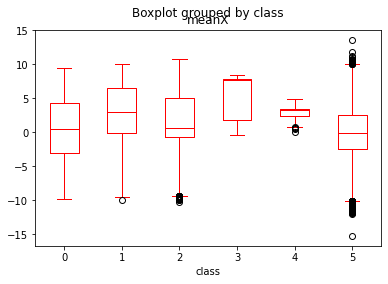

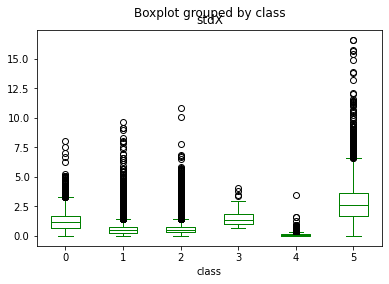

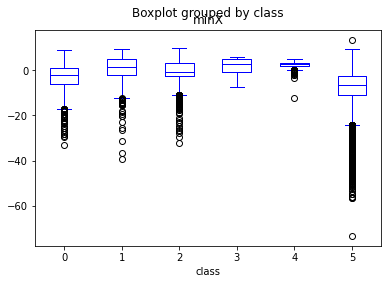

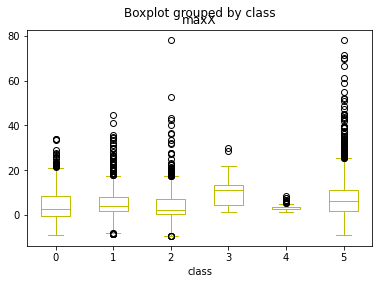

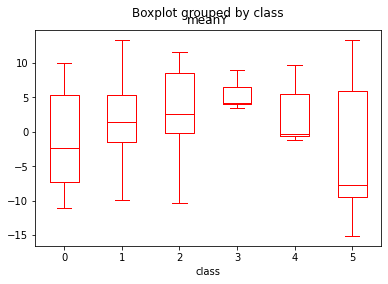

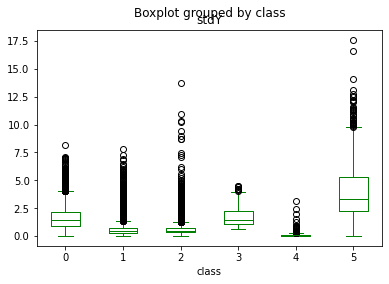

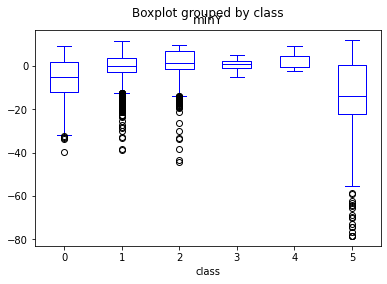

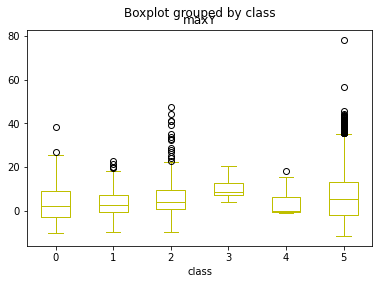

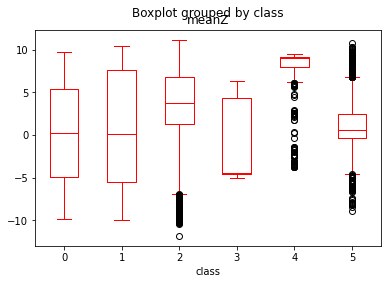

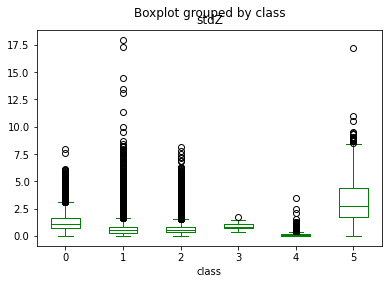

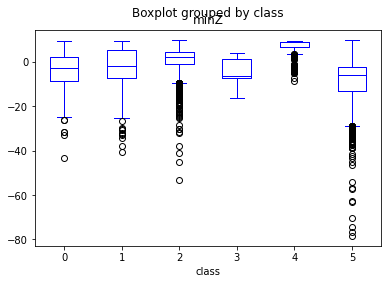

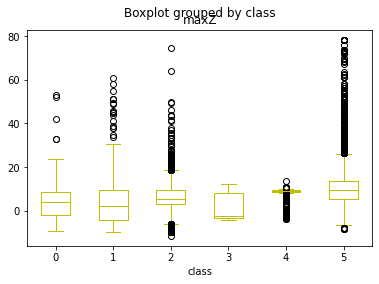

In [84]:
plt.figure()

df_features.boxplot(column = ['meanX'], by = 'class', grid = False, color = 'r')
df_features.boxplot(column = ['stdX'], by = 'class', grid = False, color = 'g')
df_features.boxplot(column = ['minX'], by = 'class', grid = False, color = 'b')
df_features.boxplot(column = ['maxX'], by = 'class', grid = False, color = 'y')

df_features.boxplot(column = ['meanY'], by = 'class', grid = False, color = 'r')
df_features.boxplot(column = ['stdY'], by = 'class', grid = False, color = 'g')
df_features.boxplot(column = ['minY'], by = 'class', grid = False, color = 'b')
df_features.boxplot(column = ['maxY'], by = 'class', grid = False, color = 'y')

df_features.boxplot(column = ['meanZ'], by = 'class', grid = False, color = 'r')
df_features.boxplot(column = ['stdZ'], by = 'class', grid = False, color = 'g')
df_features.boxplot(column = ['minZ'], by = 'class', grid = False, color = 'b')
df_features.boxplot(column = ['maxZ'], by = 'class', grid = False, color = 'y')

### Question 5

In [85]:
data = df_features.to_numpy()
print(data.shape)

(40413, 13)


In [120]:
X = data[:, :-1]
y = data[:, -1]

In [122]:
np.unique(y)

array([0., 1., 2., 3., 4., 5.])

### Question 6

### Here I have first shuffled the data using np.permutations. Then I have assigned the first 60% of data to training, next 20% to validation and the last 20% to testing data.

In [123]:
permus = np.random.permutation(len(X))

X = X[permus]
y = y[permus]
X_train = X[:(int)(0.6*len(X))]
y_train = y[:(int)(0.6*len(y))]
X_val = X[(int)(0.6*len(X)):(int)(0.8*len(X))]
y_val = y[(int)(0.6*len(y)):(int)(0.8*len(y))]
X_test = X[(int)(0.8*len(X)):]
y_test = y[(int)(0.8*len(y)):]


### Question 7

### First deploying the SVM Classifier and noting down the accuracy.

In [125]:
from sklearn import svm

In [127]:
classifier = svm.SVC()
classifier.fit(X, y)

SVC()

In [128]:
classifier.score(X_val, y_val)

0.8081157985896326

In [129]:
classifier.predict(X_test)

array([1., 2., 2., ..., 2., 5., 2.])

### Now deploying the ANN Using Tensorflow library.

In [130]:
#Loading important libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Softmax
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from scipy.stats import spearmanr

In [131]:
y = tf.keras.utils.to_categorical(y)
X_train = X[:(int)(0.6*len(X))]
y_train = y[:(int)(0.6*len(y))]
X_val = X[(int)(0.6*len(X)):(int)(0.8*len(X))]
y_val = y[(int)(0.6*len(y)):(int)(0.8*len(y))]
X_test = X[(int)(0.8*len(X)):]
y_test = y[(int)(0.8*len(y)):]

### The below cell contains my architecture

In [135]:
input_shape = [X_train.shape[1]]

mlp = tf.keras.Sequential([
    tf.keras.layers.BatchNormalization(input_shape=input_shape),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(6, activation = 'softmax'),
])

### Compiling and Training the data on ANN

In [136]:
# Compiling the model

path = 'mlp_checkpoint/checkpoint_{epoch:02d}';
mlp_checkpoint = ModelCheckpoint(filepath = path,
                            verbose = 1,
                            monitor = 'val_acc',
                            save_freq = 'epoch',
                            save_best_only = True,
                            save_weights_only = True)

mlp.compile(loss = 'categorical_crossentropy', metrics = ['acc'], optimizer = 'adam')

In [137]:
mlp_history = mlp.fit(x = X_train, y = y_train, validation_split = 0.1, epochs = 50)

Epoch 1/50
682/682 [==============================] - 6s 6ms/step - loss: 1.1203 - acc: 0.5977 - val_loss: 0.7174 - val_acc: 0.7245
Epoch 2/50
682/682 [==============================] - 4s 6ms/step - loss: 0.8319 - acc: 0.6797 - val_loss: 0.6444 - val_acc: 0.7447
Epoch 3/50
682/682 [==============================] - 4s 6ms/step - loss: 0.7809 - acc: 0.6928 - val_loss: 0.6043 - val_acc: 0.7629
Epoch 4/50
682/682 [==============================] - 4s 6ms/step - loss: 0.7601 - acc: 0.7052 - val_loss: 0.5933 - val_acc: 0.7687
Epoch 5/50
682/682 [==============================] - 4s 6ms/step - loss: 0.7394 - acc: 0.7126 - val_loss: 0.5820 - val_acc: 0.7724
Epoch 6/50
682/682 [==============================] - 4s 6ms/step - loss: 0.7306 - acc: 0.7147 - val_loss: 0.5716 - val_acc: 0.7790
Epoch 7/50
682/682 [==============================] - 4s 6ms/step - loss: 0.7203 - acc: 0.7169 - val_loss: 0.5659 - val_acc: 0.7715
Epoch 8/50
682/682 [==============================] - 4s 6ms/step - loss: 0.

### Plotting Training and Validation Losses vs epochs

Minimum Validation Loss: 0.4982


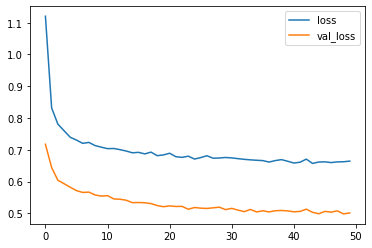

In [140]:
history_df = pd.DataFrame(mlp_history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print(("Minimum Validation Loss: {:0.4f}").format(history_df['val_loss'].min()))

### Plotting training and validation accuracies vs time/epochs

Maximum Validation Acc: 0.8153


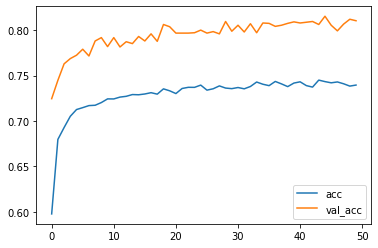

In [141]:
history_df.loc[0:, ['acc', 'val_acc']].plot()
print(("Maximum Validation Acc: {:0.4f}").format(history_df['val_acc'].max()))